In [ ]:
'''
1. Import Packages
2. Import Data
3. Preproccess Data Frame:
    1. Remove rows that have N/A values in Market Category Column
    2. Convert 'Make', 'Market Category', 'Vehicle Size', 'Vehicle Style' 
       into Numerical Enumerations
    3. Normalize data (improves accuracy for calculating distance/Euclidean Distance)
4.  Run DBSCAN for 6 Dimensional feature set for 'Make', 'Year', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'MSRP'
5. Visualize/Plot Clusters
'''

In [42]:
# Import Packages
import numpy as np
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import csv
import pandas as pd
%matplotlib inline

In [25]:
# Import Data
car_df = pd.read_csv('car_data.csv')
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [26]:
'''Preprocess Data'''

# Remove Spaces in Column Names
car_df = car_df.rename(columns={"Market Category": "Market_Category", "Vehicle Size": "Vehicle_Size", "Vehicle Style": "Vehicle_Style" })

# Drop rows where there are
car_df.drop(car_df.index[car_df['Market_Category'] == 'N/A'], inplace=True)
# car_df = car_df[car_df.Market_Category != 'N/A']

In [27]:
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
car_df.Make

0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: Make, Length: 11914, dtype: object

In [34]:
# Convert Categorical columns to numeric
M_List = car_df.Make.unique()
MK_List = car_df.Market_Category.unique()
VZ_List = car_df.Vehicle_Size.unique()
VS_List = car_df.Vehicle_Style.unique()

car_df.Make = car_df['Make'].replace(M_List, range(len(M_List)))
car_df.Market_Category = car_df['Market_Category'].replace(MK_List, range(len(MK_List)))
car_df.Vehicle_Size = car_df['Vehicle_Size'].replace(VZ_List, range(len(VZ_List)))
car_df.Vehicle_Style = car_df['Vehicle_Style'].replace(VS_List, range(len(VS_List)))

# alternatively could use pd.get_dummies() which will create a seperate column for each unique category, but to reduce dimension size we use replace method

In [35]:
car_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway MPG,city mpg,Popularity,MSRP
0,0,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,0,0,0,26,19,3916,46135
1,0,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,1,0,1,28,19,3916,40650
2,0,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,2,0,0,28,20,3916,36350
3,0,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,1,0,0,28,18,3916,29450
4,0,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,3,0,1,28,18,3916,34500


In [36]:
# Reset index for dropped rows
car_df = car_df.reset_index(drop=True)

In [41]:
# Normalize Data
predictors = car_df[['Make', 'Year', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style']].values

predictors = preprocessing.StandardScaler().fit(predictors).transform(predictors.astype(float))
predictors[0:3]

array([[-1.77192037,  0.08122813, -1.02199787, -1.07110811, -1.30207652],
       [-1.77192037,  0.08122813, -0.93462644, -1.07110811, -1.01762854],
       [-1.77192037,  0.08122813, -0.84725501, -1.07110811, -1.30207652]])

In [43]:
# Build Model

# Random state ensures that the splits that you generate are reproducible
sklearn.utils.check_random_state(1000)

DB_Model = DBSCAN(eps=0.3, min_samples=10).fit(predictors)

# Create new column in dataframe to hold our target cluster labels
clusters = DB_Model.labels_
car_df["Cluster"] = clusters

# ignore noise (-1) in our cluster count
numOfClusters = len(set(clusters)) - (1 if -1 in clusters else 0)


car_df[['Make', 'Year', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style', 'Cluster']].head(5)

,Make,Year,Market_Category,Vehicle_Size,Vehicle_Style,Cluster
0,0,2011,0,0,0,0
1,0,2011,1,0,1,0
2,0,2011,2,0,0,0
3,0,2011,1,0,0,0
4,0,2011,3,0,1,0


In [44]:
# Save Model
import joblib

# pickle files serialize your ML algorithiim and save them in a serialized format to a file
# save
joblib.dump(DB_Model, "Car_Cluster.pkl")

# using the joblib libray, you can deserialize pickle files to load your model
# load
# model = joblib.load("Car_Cluster.pkl")

# model.predict(X[0:1])

['Car_Cluster.pkl']

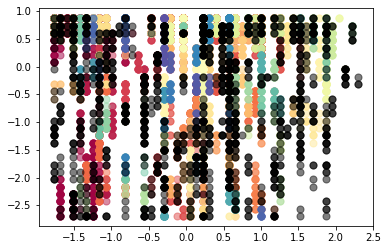

In [51]:
# Visualize Data

# create colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(clusters))))

# create an array of booleans using the labels from the model
core_samples_mask = np.zeros_like(DB_Model.labels_, dtype=bool)
core_samples_mask[DB_Model.core_sample_indices_] = True

# Plot the points with colors
for k, col in zip(set(clusters), colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (clusters == k)

    # Plot the datapoints that are clustered
    xy = predictors[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = predictors[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)